# QE DANA KARWAS
## DATA:
The average weekday ridership is indicative of the number of transit patrons making a one-way trip on any mode per weekday. This number is estimated and excludes holidays.

DATA SOURCE:
https://data.maryland.gov/Transportation/MTA-Average-Weekday-Ridership-by-Month/ub96-xxqw

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as pl
import matplotlib.dates as dates
import seaborn
from __future__  import print_function, division
import pylab as pl
import os
%pylab inline
import csv
import requests
import zipfile
import statsmodels.api as sm
from pylab import rcParams



%matplotlib inline

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


# Get the Data

In [2]:
os.getenv("PUIDATA") 

'/home/cusp/dlk253/PUIdata'

In [3]:
#read in the data
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'MTA_Month.csv')


In [4]:
#check data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 15 columns):
Month                              132 non-null object
Bus                                132 non-null int64
Metro                              132 non-null int64
Light Rail                         132 non-null int64
Mobility                           132 non-null int64
Taxi Access                        132 non-null int64
MARC Total                         120 non-null float64
MARC - Brunswick                   120 non-null float64
MARC - Camden                      120 non-null float64
MARC - Penn                        120 non-null float64
Commuter Bus Total                 78 non-null float64
CB - Baltimore                     78 non-null float64
CB - Washington                    78 non-null float64
CB - ICC                           76 non-null float64
Total Average Weekday Ridership    132 non-null int64
dtypes: float64(8), int64(6), object(1)
memory usage: 15.5+ KB


In [5]:
df1.head(5)

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,MARC Total,MARC - Brunswick,MARC - Camden,MARC - Penn,Commuter Bus Total,CB - Baltimore,CB - Washington,CB - ICC,Total Average Weekday Ridership
0,Jul-06,205015,43358,22997,2838,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275280
1,Aug-06,215455,44427,22708,2860,1162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286612
2,Sep-06,251719,44062,24085,2985,1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324062
3,Oct-06,251749,45510,22773,3055,1184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324271
4,Nov-06,247152,43469,22846,2997,1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317656


In [6]:
#drop what we do not need
df1.drop([u'MARC Total', u'MARC - Brunswick', u'MARC - Camden', u'MARC - Penn',
       u'Commuter Bus Total', u'CB - Baltimore', u'CB - Washington',
       u'CB - ICC'], axis=1, inplace=True)

In [7]:
#get column headers
df1.columns

Index([u'Month', u'Bus', u'Metro', u'Light Rail', u'Mobility', u'Taxi Access',
       u'Total Average Weekday Ridership'],
      dtype='object')

In [8]:
df1.head()

,Month,Bus,Metro,Light Rail,Mobility,Taxi Access,Total Average Weekday Ridership
0,Jul-06,205015,43358,22997,2838,1072,275280
1,Aug-06,215455,44427,22708,2860,1162,286612
2,Sep-06,251719,44062,24085,2985,1211,324062
3,Oct-06,251749,45510,22773,3055,1184,324271
4,Nov-06,247152,43469,22846,2997,1192,317656


In [15]:
#Not sure why this is not working, possibly because it has to be in the index?
#df1['Month'] = pd.to_datetime(df1['Month'], format='%Y-%m')
#df1['Month']=pd.to_datetime(df1.Year)

In [16]:
#make the Month the index
df1.set_index('Month', inplace=True)

In [17]:
df1.head(2)

,Bus,Metro,Light Rail,Mobility,Taxi Access,Total Average Weekday Ridership
Month,,,,,,
Jul-06,205015,43358,22997,2838,1072,275280
Aug-06,215455,44427,22708,2860,1162,286612


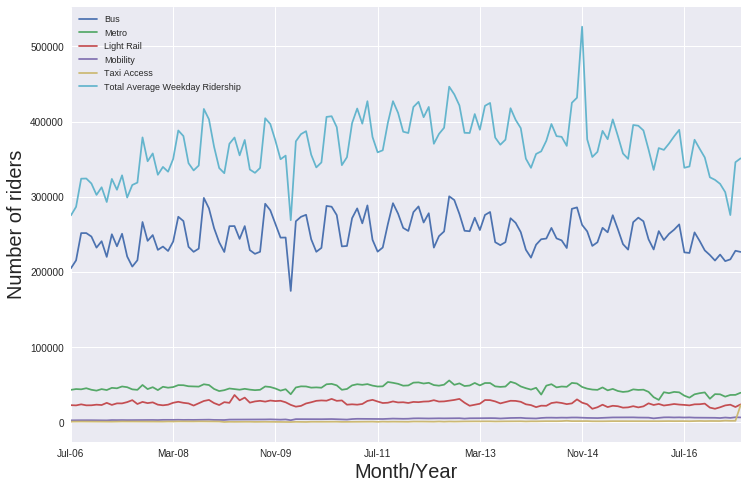

In [24]:
df1.plot(figsize=(12,8))
pl.xlabel("Month/Year", fontsize=20)
pl.ylabel('Number of riders', fontsize=20)
pl.legend(fontsize=9)
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(data, figsize=(25,25));

## A Scatter Matrix of the Ridership

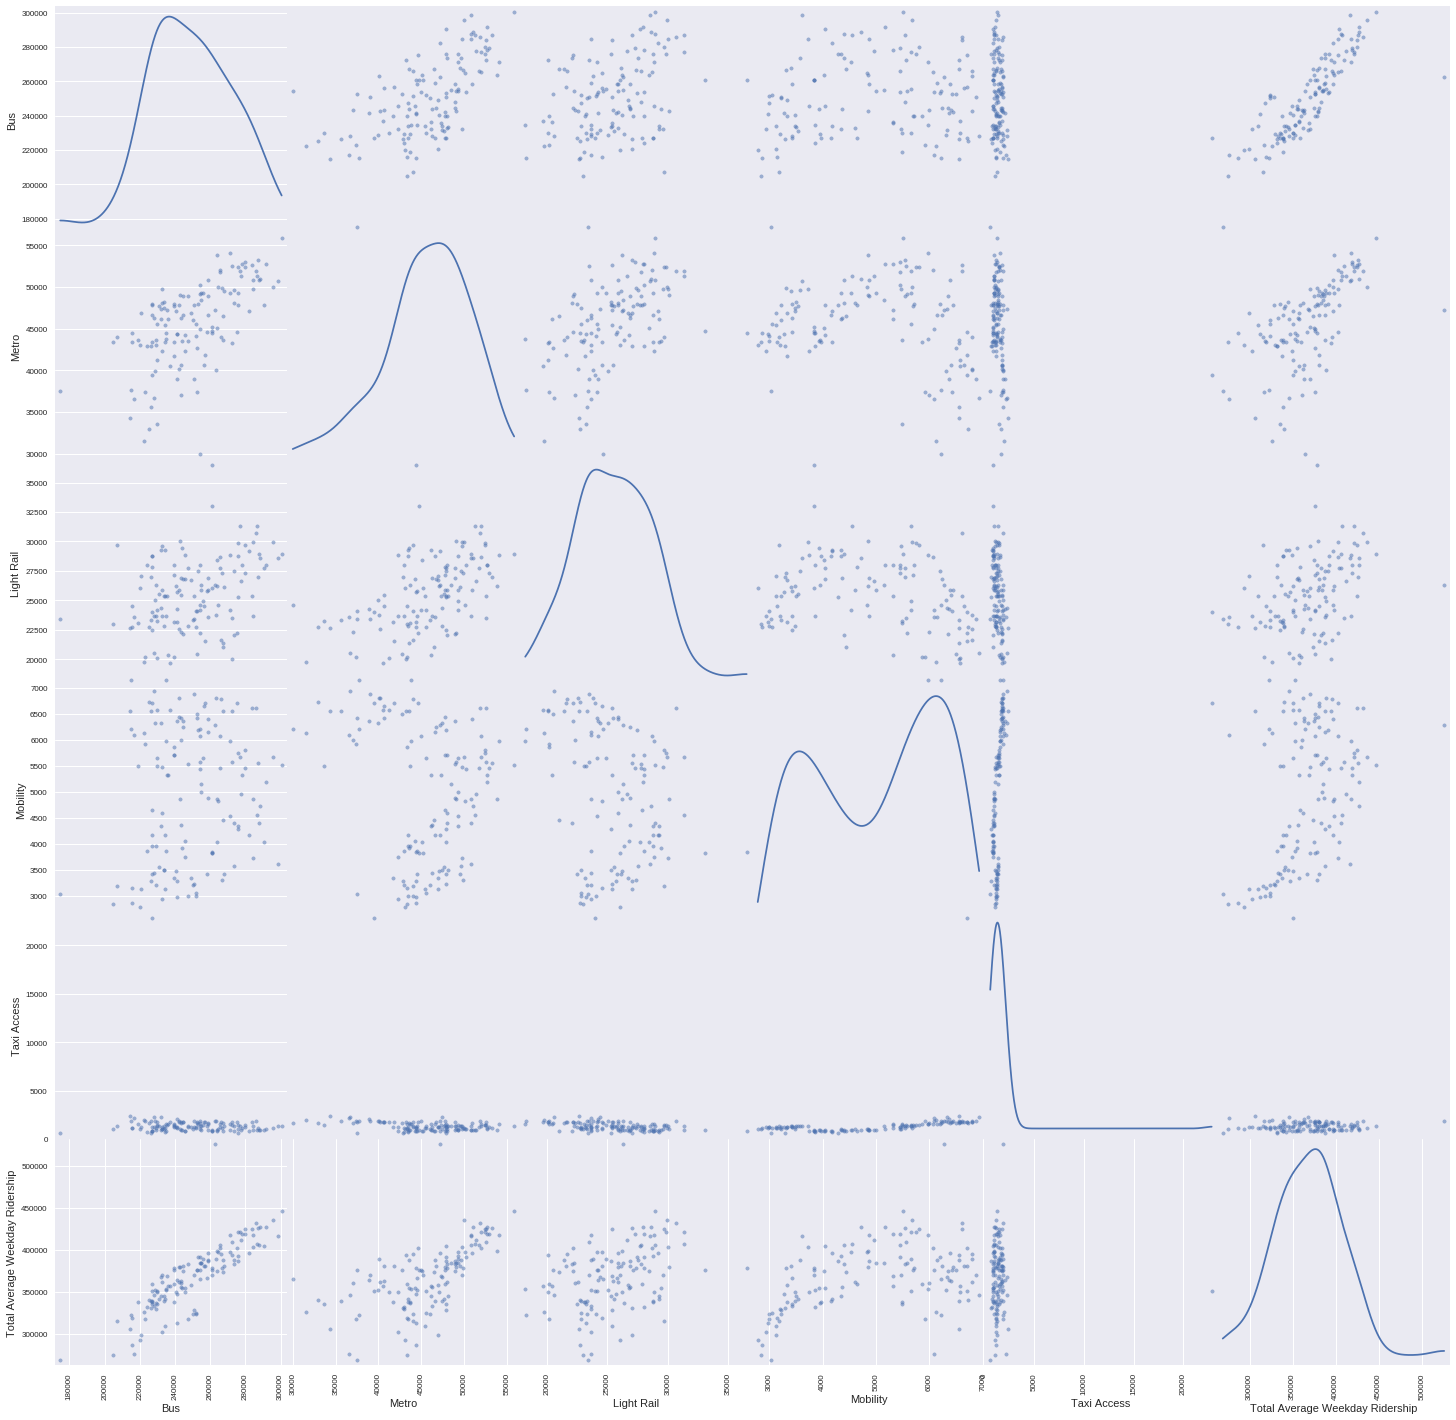

In [31]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df1, figsize=(25,25), diagonal="density");

In [33]:
df1.columns

Index([u'Bus', u'Metro', u'Light Rail', u'Mobility', u'Taxi Access',
       u'Total Average Weekday Ridership'],
      dtype='object')

## Some stuff to try

In [66]:
# not sure why the index is starting a column lower

In [67]:
# need to figure out how to convert the month year format to datetime format and am getting some trouble

In [68]:
#cannot get this to work, but this is where i was headed........
df1['Month'] =  pd.to_datetime(df1['Month'], format='%m-%Y')


Identify the rolling mean

In [ ]:
#becasue I can't ge the datetime thingy to work I am going to supplement with an MTA dataset with the differetnt
#types of card swipes from our homework.

In [69]:
data = np.load('MTA_Fare.npy').astype(float)
data[data == -1] = float('nan')means = np.nanmean(data, axis=2)


In [70]:
# get the means and sigmas for the standard deviation
means = np.nanmean(data, axis=2)
sigmas = np.nanstd(data, axis=2)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


In [71]:
#figure out the thresholds that are three sigmas above and below the mean
thresholds = [np.array(means - 3 * sigmas), np.array(means + 3 * sigmas)]

In [73]:
#this is splicing together the threshods - specifying whether we want the lower or upper threshold and the station & card pair, 
#i.e. if we want the lower threshold for station 0 and card type 0, it is:
thresholds[0][0,0]

5303.6092999939428

In [75]:
#set the time axis for which I could not get to work above
start = np.datetime64('2010-05-21')
time = [(start + np.timedelta64(event_weeks + 1, 'W')).astype(dt.datetime) for event_weeks in range(194)] 

In [ ]:
pl.figure(figsize = (15, 5))
for station in range(data.shape[0]):
    for card in range(data.shape[1]):
        pl.semilogy(time, data[station, card,:])
pl.xlabel('Weeks since 05/21/2010')
pl.ylabel('Swipes (log10)')

In [ ]:
#some other stuff I was going to try, if I had the time series into a np....

In [29]:
new_data = np.nansum(df1, axis=1).astype(int)
